# Artificial Neural Networks (ANNs)

In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(ggplot2))
suppressMessages(library(rsample))

## Neuron

<img src="https://cdn.prod.website-files.com/614c82ed388d53640613982e/64a6b6518fddd62aa2605e17_how%20do%20activation%20functions%20work.webp" alt="drawing" style="width:640px;"/>


[The source of the pic](https://www.superannotate.com/blog/activation-functions-in-neural-networks)

+ $x_1, x_2, \dots, x_n$ are the model predictors (input data)
+ $b$ is bias
+ $y = f(\sum_{i=1}^n {w_i x_i} + b)$

## Activation Functions

In [2]:
plot_activation_function <- function(name, func){
    x <- seq(-6, 6, length.out = 600)
    y <- func(x)
    # plot the function
    ggplot(tibble(x = x, y = y), 
           aes(x = x, y = y)) +
    geom_vline(xintercept = 0, linewidth = 0.5, linetype=2) +
    geom_hline(yintercept = 0, linewidth = 0.5, linetype=2) +
    geom_point(color = 'blue') +
    labs(title = paste(name, " Activation Function"),
         y = "Output", x = "Input (x)") +
    theme_minimal()
}

### Threshold activation function

$$
f(x) = 
\begin{equation*}
  \left\{
    \begin{aligned}
      & 0, \space \text{if} \space x < 0  \\
      & 1, \space \text{if} \space x \ge 0
    \end{aligned}
  \right.
\end{equation*}
$$

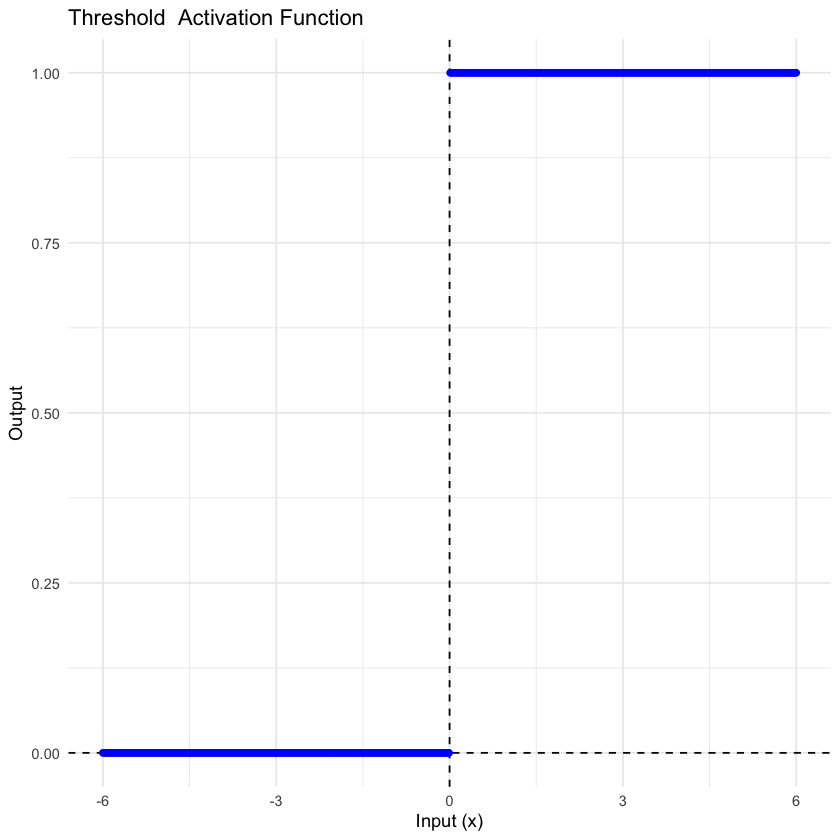

In [3]:
plot_activation_function('Threshold', function(x) ifelse(x >= 0, 1, 0))

### Sigmoid activation function

$$
f(x) = \frac {1} {1 + e^{-x}}
$$

+ $f(x) \in [0, 1]$

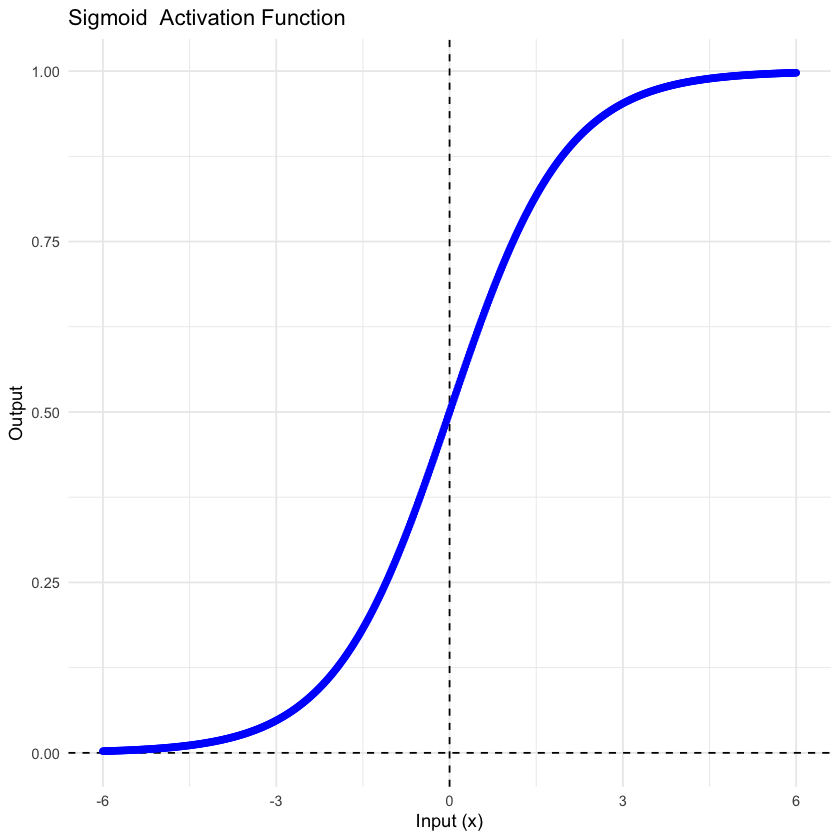

In [4]:
plot_activation_function('Sigmoid', function(x) 1/(1 + exp(-x)))

### ReLU activation function

$$
f(x) = max(0, x)
$$

+ If $x < 0$, them $f(x) = 0$
+ If $x \ge 0$, them $f(x) = x$

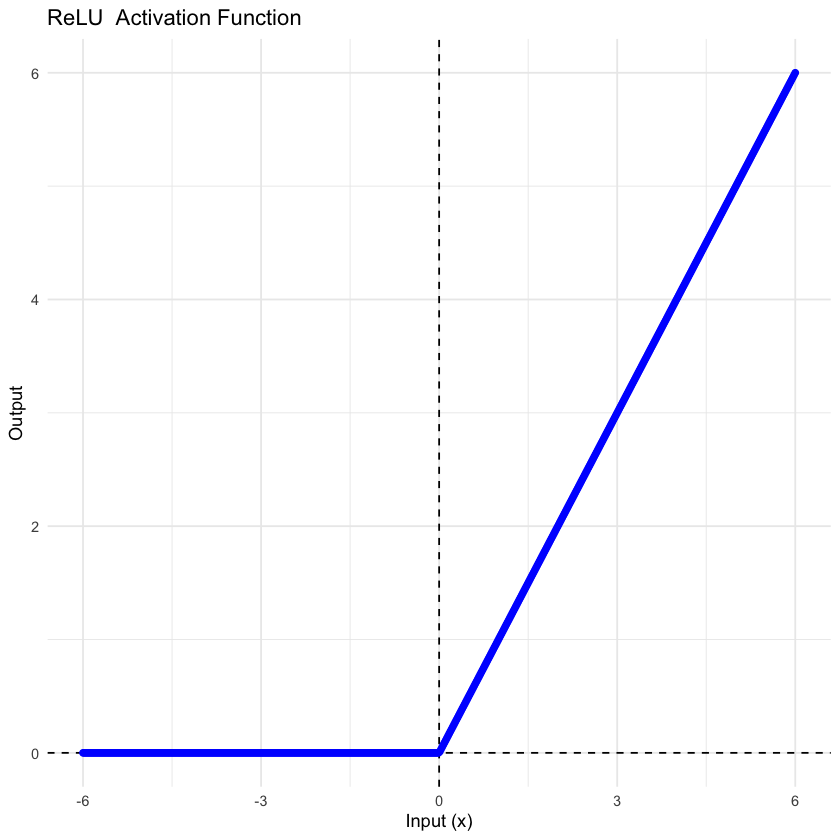

In [5]:
plot_activation_function('ReLU', function(x) ifelse(x < 0, 0, x))

### Tahn activation function

$$
f(x) = \frac {e^x - e^{-x}}{e^x + e^{-x}}
$$

+ $f(x) \in (-1, 1)$

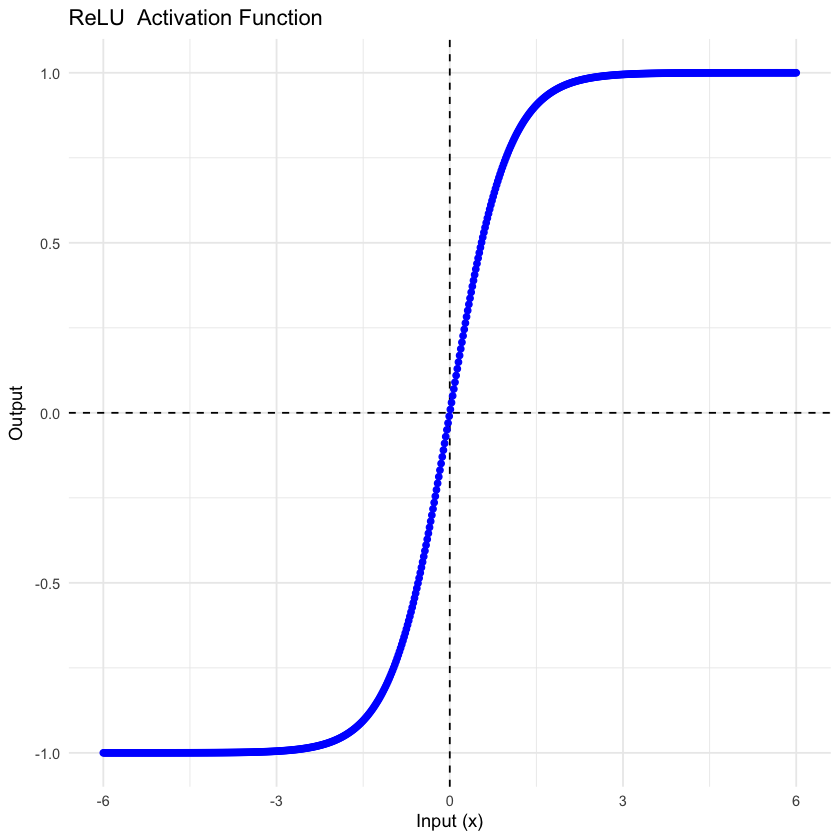

In [6]:
plot_activation_function('ReLU', function(x) tanh(x))

### Leaky ReLU activation function

$$
f(x) = 
\begin{equation*}
  \left\{
    \begin{aligned}
      & \alpha x, \space \text{if} \space x < 0  \\
      & x, \space \text{if} \space x \ge 0
    \end{aligned}
  \right.
\end{equation*}
$$

+ Usually $\alpha = 0.01$

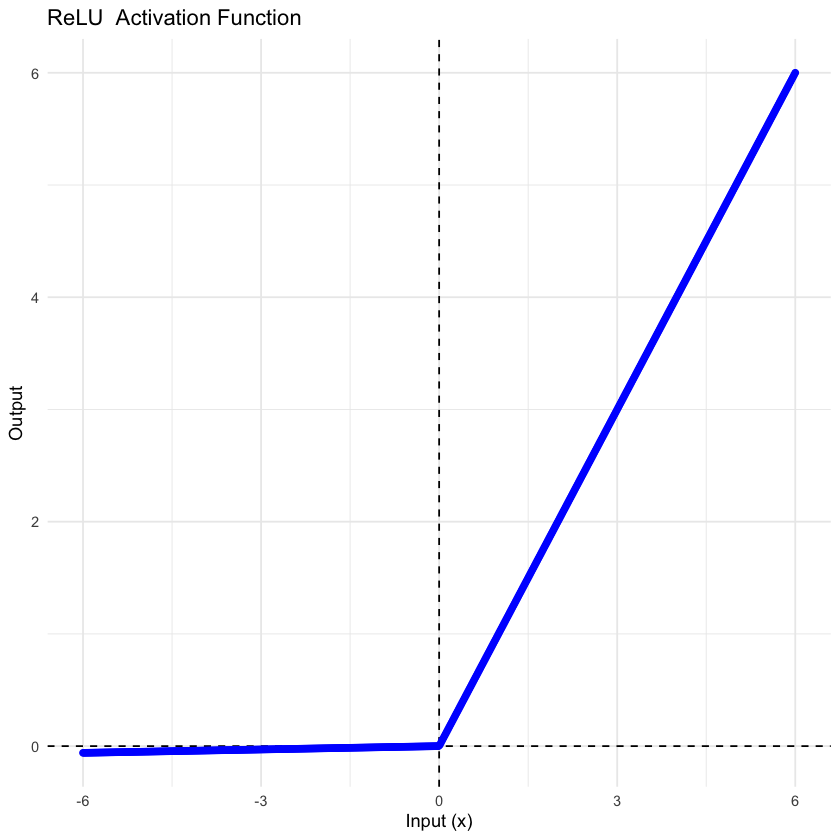

In [7]:
plot_activation_function('ReLU', function(x) ifelse(x > 0, x, x * 0.01))

## Gradient Descent

In [8]:
cost_function <- function(x){
    1/2*x**2
}

# gradient (derivative of cost function)
gradient <- function(x){
    x   
}

# Stochastic gradient (adding noise to simulate stochastic behavior)
stochastic_gradient <- function(x){
    noise = rnorm(1, mean = 0, sd = 0.1)  # Adding Gaussian noise
    x + noise
}
    

# Plot the gradient descent
plot_GD <- function(x_start, learning_rate=0.1, iterations=100, stochastic=False){
    x_values <- c(x_start)
    cost_values <- c(cost_function(x_start))
    
    x <- x_start
    for(i in 1:iterations){
        if(stochastic){
            x <- x - learning_rate * stochastic_gradient(x)
        }
        else{
            x <- x - learning_rate * gradient(x)
        }
        x_values <- append(x_values, x)
        cost_values <- append(cost_values, cost_function(x))
    }

    x_range <- seq(-6, 6, length.out =  1000)
    y_range <- cost_function(x_range)
    
    ggplot(tibble(x_range, y_range), aes(x = x_range, y = y_range)) +
    geom_line(color = "blue", linewidth = 1) +
    geom_point(data = tibble(x = x_values, y = cost_values), aes(x = x, y = y), color = "red", size = 3.5) +
    geom_line(data = tibble(x = x_values, y = cost_values), aes(x = x, y = y), color = "red", linewidth = 1, linetype = 2) +
    labs(title = ifelse(stochastic, "Stochastic Gradient Descent", "Gradient Descent"),
         y = "f(x)",
         x = "x") +
    theme_minimal()
}
    


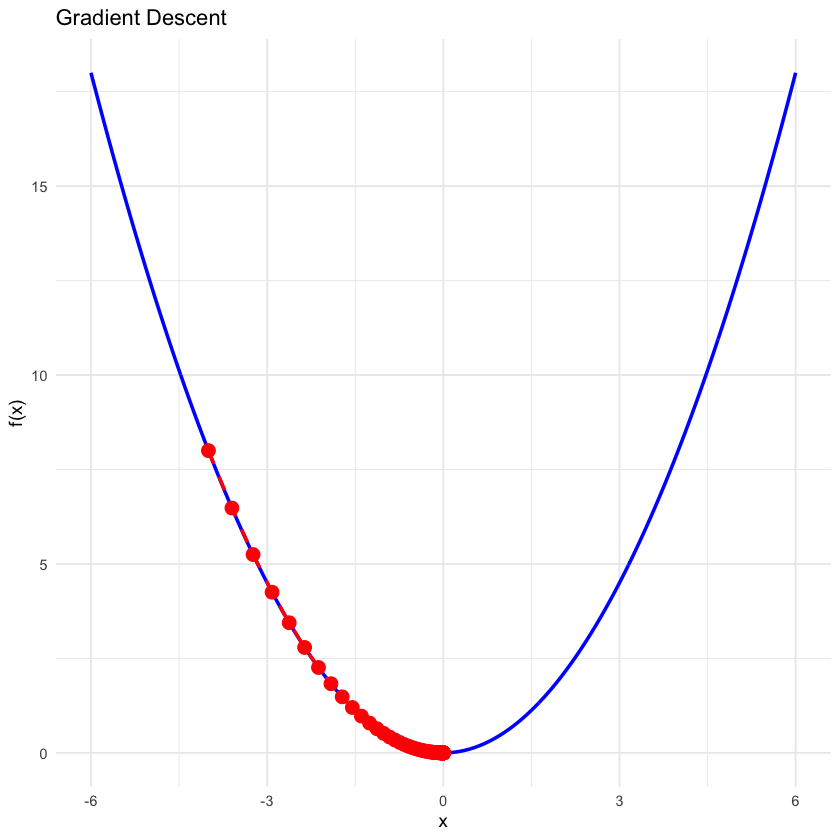

In [9]:
plot_GD(x_start=-4.0, learning_rate=0.1, iterations=100, stochastic=FALSE)

## Stochastic Gradient Descent

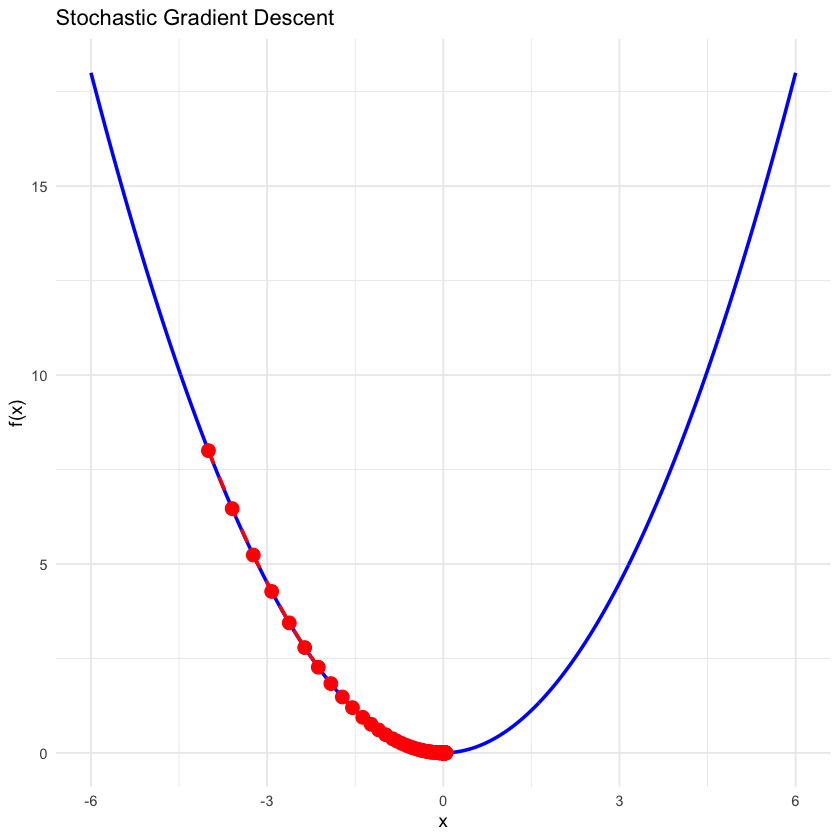

In [10]:
plot_GD(x_start=-4.0, learning_rate=0.1, iterations=100, stochastic=TRUE)

## Backward propagation of errors

Training the ANN with stochastic gradient descent.

#### Step-by-step

##### **Step 1: Initialize Weights**  
- Set all weights to small random values close to zero.

##### **Step 2: Input One Data Sample**  
- Take one **random** training example and feed it into the network.

##### **Step 3: Forward Propagation**  
- Compute the **output** by passing the input through the network layer by layer.
- Each neuron calculates a **weighted sum** and applies an **activation function**.

##### **Step 4: Compute Error (Loss Calculation)**  
- Compare the **predicted output** with the **actual value**.
- Calculate the **error** using a loss function.

##### **Step 5: Backward Propagation (Adjust Weights)**  
- Start from the **output layer** and move backward.
- Compute how much each weight contributed to the error (**gradient calculation**).
- Update weights using **gradient descent**:
  
  $$
  W = W - \eta \cdot \frac{\partial L}{\partial W}
  $$
  
  where $\eta$ is the learning rate.

##### **Step 6: Repeat for Each Training Sample**  
- Unlike batch gradient descent, which updates weights **after seeing all data**, **SGD updates weights after each individual training example**.
- This allows faster learning but introduces **more noise**.

##### **Step 7: Repeat Until Convergence (Multiple Epochs)**  
- One full pass through the dataset is called an **epoch**.
- Run multiple epochs until the **error is minimized**.

## Dataset

In [11]:
# data loading 
suppressMessages(data <- read_csv('../00_data/Churn_Modelling.csv'))

head(data)

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [12]:
tail(data)

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [13]:
sum(is.na(data))

[1] 0

## Data Preprocessing

### Features encoding

In [14]:
data <- data[4:14]
# encoding categorical features as factors
data$Geography <- as.numeric(factor(data$Geography,
                        levels = c("France", "Spain", "Germany"),
                        labels = c(1, 2, 3)))
data$Gender <- as.numeric(factor(data$Gender,
                        levels = c("Female", "Male"),
                        labels = c(1, 2)))

glimpse(data)

Rows: 10,000
Columns: 11
$ CreditScore     <dbl> 619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528,…
$ Geography       <dbl> 1, 2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 2, 1, 1, 2, 3, 3, 2, …
$ Gender          <dbl> 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, …
$ Age             <dbl> 42, 41, 42, 39, 43, 44, 50, 29, 44, 27, 31, 24, 34, 25…
$ Tenure          <dbl> 2, 1, 8, 1, 2, 8, 7, 4, 4, 2, 6, 3, 10, 5, 7, 3, 1, 9,…
$ Balance         <dbl> 0.00, 83807.86, 159660.80, 0.00, 125510.82, 113755.78,…
$ NumOfProducts   <dbl> 1, 1, 3, 2, 1, 2, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, …
$ HasCrCard       <dbl> 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, …
$ IsActiveMember  <dbl> 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, …
$ EstimatedSalary <dbl> 101348.88, 112542.58, 113931.57, 93826.63, 79084.10, 1…
$ Exited          <dbl> 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, …


### Split into training and test set

In [15]:
# split into training and test set
set.seed(42)
split <- initial_split(data, prop = 0.8)

train_data <- training(split)
test_data <- testing(split)

# check sizes
print(paste("Data size:", nrow(data)))
print(paste("Training set size:", nrow(train_data)))
print(paste("Test set size:", nrow(test_data)))

[1] "Data size: 10000"
[1] "Training set size: 8000"
[1] "Test set size: 2000"


### Feature Scaling

In [16]:
train_mean <- sapply(train_data[-11], mean)
train_sd <- sapply(train_data[-11], sd)

In [17]:
train_data[-11] <- scale(train_data[-11])
test_data[-11] <- scale(test_data[-11])

In [18]:
train_data[1:5,]

CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.9660124,0.3022319,0.9085963,0.85338082,1.7290880,-1.22872607,0.8117419,0.6507185,0.9711048,1.4828372,0
2.0624544,-0.9012800,0.9085963,0.75828204,0.3434273,-1.22872607,-0.9089617,0.6507185,-1.0296262,1.5227920,1
-0.9246682,-0.9012800,-1.1004613,-0.76329850,-1.3886485,0.07391275,0.8117419,0.6507185,0.9711048,-0.6024673,0
-0.6455945,1.5057438,-1.1004613,0.09259055,1.7290880,0.77821531,-0.9089617,0.6507185,-1.0296262,0.3765025,1
-0.4078650,1.5057438,-1.1004613,0.94847960,1.3826729,0.61760838,0.8117419,0.6507185,0.9711048,0.6749214,1


In [19]:
test_data[1:5,]

CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.06025773,0.2992431,0.9273807,0.5300981,1.01918026,0.6273392,0.7914785,0.6273208,-1.0343395,0.8458638,1
-1.59720641,0.2992431,0.9273807,-1.3987588,-0.69632262,-1.2140896,0.7914785,0.6273208,-1.0343395,-0.4268844,0
-1.05719741,-0.9073822,-1.0777667,-1.3023160,-0.01012147,-1.2140896,0.7914785,-1.5932837,-1.0343395,1.5588756,0
0.78091012,-0.9073822,-1.0777667,-1.3987588,0.33297911,-1.2140896,0.7914785,0.6273208,0.9663172,-0.8027407,0
0.84321885,-0.9073822,0.9273807,0.2407696,1.01918026,-1.2140896,0.7914785,0.6273208,0.9663172,1.2124127,0


## Building the ANN

### `h2o` library

In [20]:
#install.packages("h2o")
suppressMessages(library(h2o))

In [21]:
suppressWarnings(h2o.init(nthreads = -1))

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 minutes 42 seconds 
    H2O cluster timezone:       Europe/Amsterdam 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.44.0.3 
    H2O cluster version age:    1 year, 1 month and 24 days 
    H2O cluster name:           H2O_started_from_R_dmitry_luchkin_fwy027 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.97 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 4.4.1 (2024-06-14) 



In [22]:
h2o_train_data <- train_data
h2o_test_data <- test_data
h2o_train_data$Exited <- factor(h2o_train_data$Exited)
h2o_test_data$Exited <- factor(h2o_test_data$Exited)

In [23]:
# train ANN on training set
classifier <- h2o.deeplearning(y = "Exited",
                               training_frame = as.h2o(h2o_train_data),
                               activation = "Rectifier",
                               hidden = c(6, 6),  # (10 features + 1 outpout) / 2 = 5.5 ~ 6
                               epochs = 100,
                               train_samples_per_iteration = -2)

  |======================================================================| 100%
  |======================================================================| 100%


In [24]:
# predict on test set
predictions <- h2o.predict(classifier, newdata = as.h2o(h2o_test_data[-11]))

  |======================================================================| 100%
  |======================================================================| 100%


In [25]:
# Convert probabilities to class labels (0 or 1)
predicted_classes <- as.vector(predictions$predict)
# Confusion matrix
table(h2o_test_data$Exited, predicted_classes)

   predicted_classes
       0    1
  0 1359  223
  1  145  273

In [26]:
print(paste('Accuracy: ', mean(h2o_test_data$Exited == predicted_classes)))

[1] "Accuracy:  0.816"


In [27]:
# single prediction
new_data <- data.frame(matrix(c(600, 1, 2, 40, 3, 60000, 2, 1, 1, 50000), nrow = 1))
names(new_data) <- names(train_data)[-11]
new_data <- scale(new_data, center = train_mean, scale = train_sd)
# predict
prediction <- h2o.predict(classifier, newdata = as.h2o(new_data))
ifelse(as.vector(prediction$predict) > 0.5, 1, 0)

  |======================================================================| 100%
  |======================================================================| 100%


[1] 0

In [28]:
h2o.shutdown(prompt = FALSE)

### `tensorflow` library

In [29]:
#install.packages("tensorflow")
#install.packages("keras3")

In [30]:
# Load libraries
library(keras3)
#library(tensorflow)

In [31]:
# Define a ANN model
model <- keras_model_sequential()
model |>
  layer_dense(units = 6, activation = "relu", input_shape = c(10)) %>% # first hidden layer and first layer with 10 inputs
  layer_dense(units = 6, activation = "relu") %>% # second hidden layer
  layer_dense(units = 1, activation = "sigmoid")  # binary classification

# Compile the model
model %>% compile(
  optimizer = 'adam',
  loss = "binary_crossentropy",
  metrics = "accuracy"
)

# Print model summary
summary(model)

Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                     │ (None, 6)                │            66 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 6)                │            42 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 1)                │             7 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 115 (460.00 B)
 Trainable params: 115 (460.00 B)
 Non-trainable params: 0 (0.00 B)


In [32]:
# Train the model
history <- model %>% fit(
  as.matrix(train_data[,-ncol(train_data)]), 
  as.numeric(train_data$Exited),
  epochs = 100,
  batch_size = 32,
  validation_split = 0.2
)

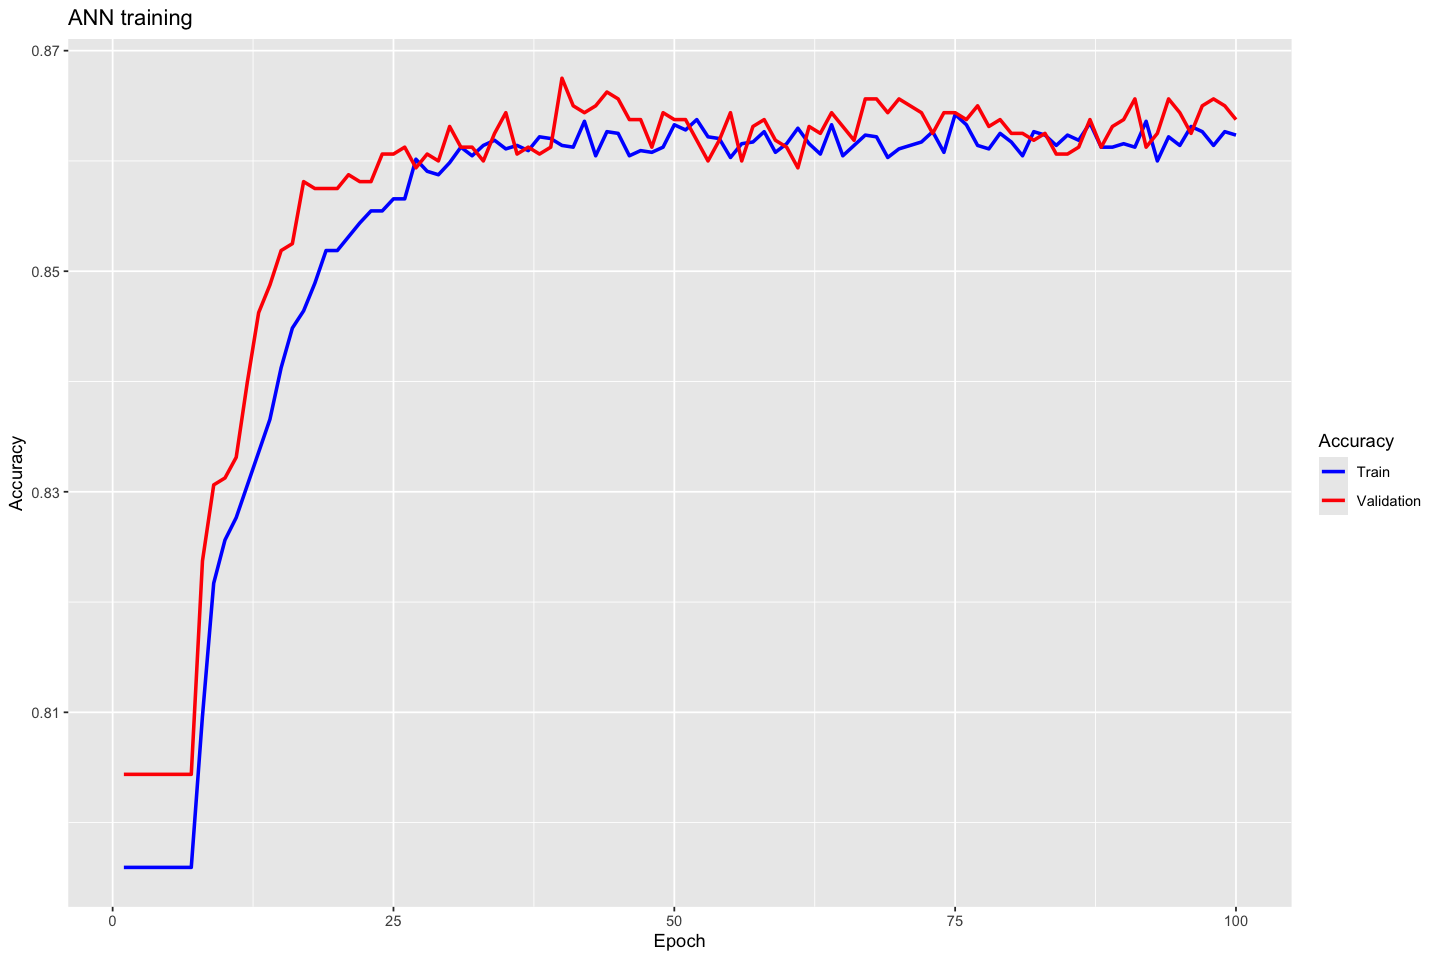

In [33]:
# plot training process
options(repr.plot.width=12, repr.plot.height=8)
ggplot(tibble(epoch = 1: length(history$metrics$accuracy),
              accuracy = history$metrics$accuracy, 
              val_accuracy = history$metrics$val_accuracy),
       aes(x = epoch)) +
    geom_line(aes(y = accuracy, color = "Train"), linewidth = 1) +
    geom_line(aes(y = val_accuracy, color = "Validation"), linewidth = 1) +
    scale_color_manual("Accuracy", values=c("Train"="blue", "Validation"="red")) +
    labs(title = "ANN training", y = "Accuracy", x = "Epoch")

In [34]:
# Predict on test data
predictions <- model %>% predict(as.matrix(test_data[,-ncol(test_data)]))

# Convert probabilities to class labels (0 or 1)
predicted_classes <- ifelse(predictions > 0.5, 1, 0)

table(test_data$Exited, predicted_classes)

   predicted_classes
       0    1
  0 1525   57
  1  235  183

In [35]:
# Evaluate the model on test data
final_results <- model %>% evaluate(as.matrix(test_data[,-ncol(test_data)]), test_data$Exited)
print(final_results$accuracy)

[1] 0.854


## Single prediction

In [36]:
joey_tribbiani <- matrix(c(600, 1, 2, 40, 3, 60000, 2, 1, 1, 50000), nrow = 1)
ifelse(model %>% predict(scale(joey_tribbiani, center = train_mean, scale = train_sd)) > 0.5, 1, 0)

0
